In [28]:
# WEATHERPY: HOMEWORK 6 APIs Project

In [176]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine the city based on Latitude and Longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [177]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(len(cities), cities)
len(cities)

611

In [178]:
# Weather check on each city using a series of successive API calls including a print log of each
    # city as it's being processed (with city name and city number)

# base url and api key
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
api_key = "b0cee0b265a015d896d7d17bcf326e7b" # OpenWeather API key

# empty lists for storing responses for desired parameters
city_responses = [] # stores ALL cities' data -- measuring tool to check data collection
cloudiness = []     # cloudiness percentages
country = []        # country codes
date = []           # unix timestamps 
humidity = []       # humidity percentages
lat = []            # latitude
lng = []            # longitude
max_temp = []       # maximum temperature in kelvin
wind_speed = []     # wind speeds
name = []           # city names

indices = len(cities) # creating a variable for the number of cities found above

In [179]:
# Loop to make a request for each of the indices

for city in range(len(cities)):
    
    response = requests.get(base_url + "appid=" + api_key + "&q=" + str(cities[city]))
    response_json = response.json()
    city_responses.append(response.json())
    
    try:
        print(f"City Found! Processing record {city} for {str(cities[city])}")
        city_responses.append(response.json())
        name.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        
    except:
        print("City not found. Skipping...")
        pass

City Found! Processing record 0 for hermanus
City Found! Processing record 1 for qaanaaq
City Found! Processing record 2 for yellowknife
City Found! Processing record 3 for chokurdakh
City Found! Processing record 4 for hofn
City Found! Processing record 5 for cherskiy
City Found! Processing record 6 for rikitea
City Found! Processing record 7 for sentyabrskiy
City not found. Skipping...
City Found! Processing record 8 for lata
City Found! Processing record 9 for hilo
City Found! Processing record 10 for airai
City Found! Processing record 11 for ancud
City Found! Processing record 12 for svetlaya
City Found! Processing record 13 for busselton
City Found! Processing record 14 for bagli
City Found! Processing record 15 for nikolskoye
City Found! Processing record 16 for punta arenas
City Found! Processing record 17 for avarua
City Found! Processing record 18 for ponta do sol
City Found! Processing record 19 for gorno-chuyskiy
City not found. Skipping...
City Found! Processing record 20 

In [180]:
# Dataframe to perform weather check of randomly chosen cities within a given range of coordinates

city_df = pd.DataFrame({
    'City': name,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed,
})
city_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,0,ZA,1578114216,84,-34.42,19.24,293.71,2.24
1,Qaanaaq,100,GL,1578114216,97,77.48,-69.36,232.39,0.66
2,Yellowknife,75,CA,1578114216,75,62.45,-114.38,248.15,2.60
3,Chokurdakh,38,RU,1578114217,99,70.62,147.90,244.12,1.49
4,Hofn,100,IS,1578114184,66,64.25,-15.21,274.01,8.64
5,Cherskiy,10,RU,1578114217,62,68.75,161.30,255.44,4.35
6,Rikitea,97,PF,1578114217,79,-23.12,-134.97,298.92,5.49
7,Lata,35,IN,1578113970,81,30.78,78.62,263.36,3.20
8,Hilo,40,US,1578114048,65,19.71,-155.08,299.15,1.50
9,Airai,100,TL,1578114218,87,-8.93,125.41,293.87,2.08


In [184]:
# Finding any potential duplicate cities
city_df['City'].value_counts()

Praia da Vitoria    1
Pasinler            1
Saint-Augustin      1
Marathon            1
Lingao              1
                   ..
Port Blair          1
Vao                 1
Hobyo               1
Fatsa               1
Ewa Beach           1
Name: City, Length: 543, dtype: int64

In [185]:
# Removing any duplicate cities in the dataframe
df = pd.DataFrame(city_df)
city_dupl = pd.DataFrame.drop_duplicates(df)
city_reindex = city_dupl.reset_index(drop=True)
city_reindex.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,0,ZA,1578114216,84,-34.42,19.24,293.71,2.24
1,Qaanaaq,100,GL,1578114216,97,77.48,-69.36,232.39,0.66
2,Yellowknife,75,CA,1578114216,75,62.45,-114.38,248.15,2.60
3,Chokurdakh,38,RU,1578114217,99,70.62,147.90,244.12,1.49
4,Hofn,100,IS,1578114184,66,64.25,-15.21,274.01,8.64
5,Cherskiy,10,RU,1578114217,62,68.75,161.30,255.44,4.35
6,Rikitea,97,PF,1578114217,79,-23.12,-134.97,298.92,5.49
7,Lata,35,IN,1578113970,81,30.78,78.62,263.36,3.20
8,Hilo,40,US,1578114048,65,19.71,-155.08,299.15,1.50
9,Airai,100,TL,1578114218,87,-8.93,125.41,293.87,2.08


In [186]:
# Checking information on the dataframe
city_reindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
City          543 non-null object
Cloudiness    543 non-null int64
Country       543 non-null object
Date          543 non-null int64
Humidity      543 non-null int64
Lat           543 non-null float64
Lng           543 non-null float64
Max Temp      543 non-null float64
Wind Speed    543 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.3+ KB


In [187]:
# Checking meaningful values of the dataframe before creating visualizations
city_reindex.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,543.000000,5.430000e+02,543.000000,543.000000,543.000000,543.000000,543.000000
mean,54.613260,1.578114e+09,73.900552,19.298711,14.394936,284.389816,3.925212
std,38.284929,7.956176e+01,19.849463,33.270668,91.674134,15.927448,3.222062
min,0.000000,1.578114e+09,1.000000,-54.810000,-179.170000,232.390000,0.250000
25%,16.000000,1.578114e+09,64.000000,-6.980000,-68.560000,273.860000,1.560000
50%,65.000000,1.578114e+09,78.000000,21.690000,18.420000,287.590000,3.100000
75%,90.000000,1.578114e+09,89.000000,46.430000,95.025000,296.805000,5.360000
max,100.000000,1.578114e+09,100.000000,78.220000,179.320000,320.150000,24.220000


In [188]:
# Exporting dataframe as csv file
city_csv = city_reindex.to_csv('c:/Users/Rudy/Documents/Homework Data/HW6 APIs/city_data.csv',
                              index=None, header=True)

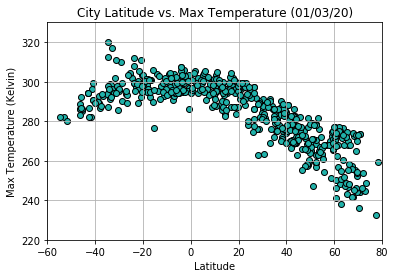

In [189]:
# Scatter plot of Latitude vs Temperature 
plt.scatter(city_reindex['Lat'], city_reindex['Max Temp'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Max Temperature (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
plt.xlim(-60,80)
plt.ylim(220,330)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_temp.png")
plt.show()

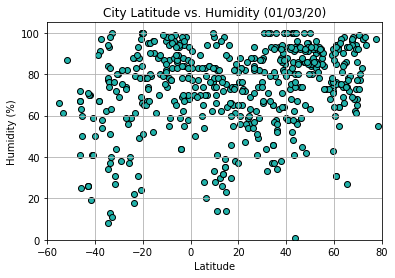

In [190]:
# Scatter plot of Latitude vs Humidity 
plt.scatter(city_reindex['Lat'], city_reindex['Humidity'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Humidity (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-60,80)
plt.ylim(0,105)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_humidity.png")
plt.show()

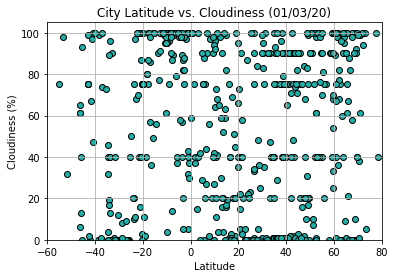

In [191]:
# Scatter plot of Latitude vs Cloudiness
plt.scatter(city_reindex['Lat'], city_reindex['Cloudiness'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Cloudiness (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-60,80)
plt.ylim(0,105)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_clouds.png")
plt.show()

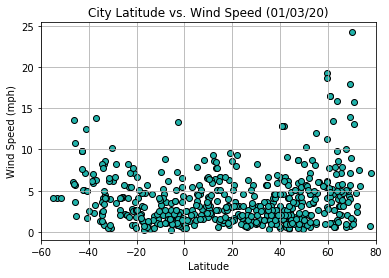

In [192]:
# Scatter plot of Latitude vs Wind Speed
plt.scatter(city_reindex['Lat'], city_reindex['Wind Speed'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Wind Speed (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-60,80)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_wind.png")
plt.show()